# K-means elbow method

From: https://pythonprogramminglanguage.com/kmeans-elbow-method/

The k-means algorithm can cluster observed data. But how many clusters (k) are there?

The elbow method finds the optimal value for k (#clusters). The elbow method plots the value of a cost function produced by different values of k for the considered dataset. The funciton mesures the "distance" between the data points and the respective centroid of the cluster to which the data point belongs.

We can define different cost functions - e.g., the total within-cluster sum of square (wss).

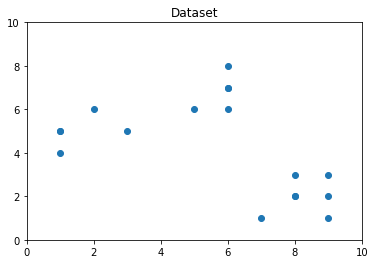

In [1]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

# plot the data as points in a 2-D space
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [2]:
# data - restructured as points
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
print (X)


[[3 5]
 [1 4]
 [1 5]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]


Let's use this cost function: the total within-cluster sum of square (wss)

Let's plot:
 - values for K on the X axis
 - the distortion on the Y axis (the values calculated with the cost function between the points of a cluster and their centroid)

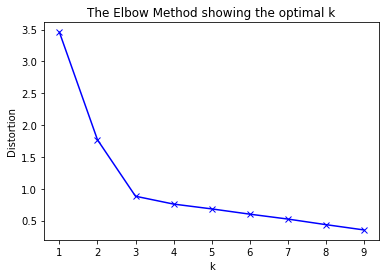

In [3]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    # number of clusters to form and number of centroids to generate
    kmeanModel = KMeans(n_clusters=k)
    # compute k-means clustering
    kmeanModel.fit(X)
    # min cost function - the total within-cluster sum of square (wss)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We observe:
 - When K increases, the centroids are closer to the clusters centroids.
 - The improvements will decline, at some point rapidly, creating the elbow shape.
 - The point on the elbow is the optimal value for K. In our test above, K=3.

From: http://www.awesomestats.in/python-cluster-validation/

Let's use a different cost function. 

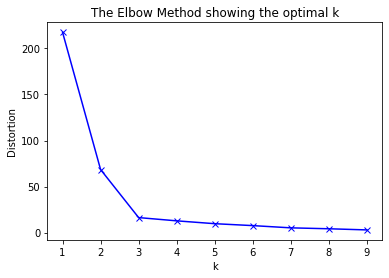

In [4]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    # number of clusters to form and number of centroids to generate
    kmeanModel = KMeans(n_clusters=k)
    # compute k-means clustering
    kmeanModel.fit(X)
    # inertia_ : float
    # sum of squared distances of samples to their closest cluster center
    distortions.append( kmeanModel.inertia_ )

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The observations above are still valid:

 - When l increases, the centroids are closer to the clusters centroids
 - The improvements will decline, at some point rapidly, creating the elbow shape
 - The point at the elbow is the optimal value for K. In the image above, K=3.